# Niboon Boonprakob 61340500038

# 2 Sentiment Analysis
## 2.2 Movie Review Data

Let us first start by looking at the data provided with the exercise. We have positive and negative movie reviews labeled by human readers, all positive and negative reviews are in the ‘pos’ and ‘neg’ folders respectively. If you look in- side a sample file, you will see that these review messages have been ‘tokenized’, where all words are separated from punctuations.
There are approximately 1000 files in each category with files names starting with cv000, cv001, cv002 and so on. You will split the dataset into training set and testing set.

1. Write some code to load the data from text files.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from os import listdir
from os.path import join
from collections import Counter

In [2]:
# function load file text 

def load_data (filename):
    file = open(filename , "r")
    text = file.read() # read all 
    file.close()
    return text


In [4]:
# load_data("review_polarity/txt_sentoken/neg/cv000_29416.txt")

In [5]:
text_all = []

directory = "review_polarity/txt_sentoken/neg"
for filename in listdir(directory): 
    if not filename.endswith(".txt"):
        continue
    path = directory + "/" + filename
    file = open(path)
    text = file.read()
    file.close()
#     print(text)
    text_all.append(text)
    
directory = "review_polarity/txt_sentoken/pos"
for filename in listdir(directory): 
    if not filename.endswith(".txt"):
        continue
    path = directory + "/" + filename
    file = open(path)
    text = file.read()
    file.close()
     #print(text)
    text_all.append(text)

In [6]:
# text_all

In [7]:
# !pip install -U nltk

     |████████████████████████████████| 1.5 MB 1.5 MB/s eta 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.6.1
    Uninstalling nltk-3.6.1:
      Successfully uninstalled nltk-3.6.1


In [8]:
import nltk
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [9]:
# Clean text data 
from nltk.corpus import stopwords
import string 
def clean_text(data):
    dataframe = data.split()
    table = str.maketrans("","",string.punctuation)
    dataframe = [w.translate(table) for w in dataframe]
    dataframe = [word for word in dataframe if word.isalpha()]

    stop_words = set(stopwords.words('english'))
    dataframe = [w for w in dataframe if not w in stop_words]

    dataframe = [word for word in dataframe if len(word) >1 ]
    return dataframe

In [10]:
def all_text (directory , vocab):
    load_line = []
    for filename in listdir(directory):
        if not filename.endswith(".txt"):
            continue
        path = directory + "/" + filename
        #add_text_to_vocab(path , vocab)
        load = add_text_to_vocab(path , vocab)
        load_line.append(load)
    return load_line

In [11]:
def add_text_to_vocab(filename , vocab):
    text = load_data(filename) # load test
    dataframe = clean_text(text)
    vocab.update(dataframe)
    # filter vocab 
    dataframe = [w for w in dataframe if w in vocab]
    return ''.join(dataframe)

In [12]:
# define vocab (pos , neg)
vocab = Counter()
vocab_pos = all_text("review_polarity/txt_sentoken/pos",vocab)
vocab_neg = all_text("review_polarity/txt_sentoken/neg",vocab)

In [13]:
len(vocab)

46557

In [14]:
vocab.most_common(20)

[('film', 8860),
 ('one', 5521),
 ('movie', 5440),
 ('like', 3553),
 ('even', 2555),
 ('good', 2320),
 ('time', 2283),
 ('story', 2118),
 ('films', 2102),
 ('would', 2042),
 ('much', 2024),
 ('also', 1965),
 ('characters', 1947),
 ('get', 1921),
 ('character', 1906),
 ('two', 1825),
 ('first', 1768),
 ('see', 1730),
 ('well', 1694),
 ('way', 1668)]

In [15]:
# Save Prepared data 
def save_text (path , filename):
    data = '\n'.join(path)
    file = open(filename,"w")
    file.write(data)
    file.close()

In [16]:
# หาอันที่มีโอกาสเกิดน้อยที่สุด 
min_occurrence = 5
tokens = [i for i,j in vocab.items() if j >= min_occurrence]

In [18]:
# print(tokens , len(tokens))

In [19]:
save_text(tokens,"data_vocab.txt")

In [20]:
# load vocab 
df_vocab = "data_vocab.txt"
df_vocab = load_data(df_vocab)
df_vocab = df_vocab.split()
df_vocab = set(df_vocab)
neg_data = all_text("review_polarity/txt_sentoken/neg/" , vocab)
pos_data = all_text("review_polarity/txt_sentoken/pos/" , vocab)

# save pos_data and neg_data 
save_text(neg_data , "data_neg.txt")
save_text(pos_data , "data_pos.txt")

## 2.3 TF-IDF
From a raw text review, you want to create a vector, whose elements indicate the number of each word in each document. The frequency of all words within the documents are the ‘features’ of this machine learning problem.

A popular method for transforming a text to a vector is called tf-idf, short for term frequencyinverse document frequency.

1. Conduct a research about tf-idf and explain how it works.
2. Scikit-learn provides a module for calculating this, this is called TfidfVec- torizer.
You can study how this function is used here:

`http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html`

Write code to transform your text to tf-idf vector.

## Conduct a research about tf-idf and explain how it works.

หลังการทำงานของ Tf-idf  คือ ใช้เปรียบเทียบความเหมือนกันของคำสอนคำ โดยวัดจาก tf และ idf
การวัด cosine ตรงๆระหว่างคำสองคำไม่ค่อยเหมาะ เนื่องจากข้อมูลจะเบ้หนักมาก แล้วก็แยกแยะกันได้ยาก 
เช่น คำพวก the , it , they พวกนี้จะมาทำการแยกยากเพราะไม่ค่อยให้ข้อมูลอะไร เราเลยจะใช้ Tf-idf เข้ามาช่วย

Tf : Term frequency คือการนับความถี่ของคำ (t) ในเอกสาร (d) จำนวนคำ 
                        tf = count(t,d)
หรือเราสามา take log ฐาน 10 เข้าไปเพื่อปรับสเกลไม่ให้เวอร์เกินไป 
                        tf = log10(count(t,d)+1)
                  (+1 เพราะว่าไม่ให้เกิดเคส log0)
idf : Inverse Document Frequency 
 df : document Frequency คือจะให้ weight เยอะๆสำหรับคำที่เจอไม่บ่อยในเอาสารมันมาจากแนวคิดว่าถ้าคำไหนเจอบ่อยๆใน เอกสารจะแปลว่ามันไม่สำคัญ
 df จะแตกต่างจาก collection frquency ตรงที่ถ้ากรอบ collection ของเราคือ document หลายๆชิ้นเวลานับ document frquency เราจะนับคำนั้นๆไปโผล่ใน
 document กี่ชิ้น ส่วน collection fequency จะนับว่าคำนั้นไปโผล่ใน collection (document ไหนก็ได้) กี่ครั้ง

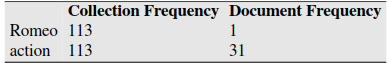

In [ ]:
from IPython import display
display.Image("pic_tf-idf/0_nFyAU7l38Wo1dHhK.png")

เราจะใช้ Inverse Document Frequency ดทนเพื่อให้ตีความง่านกว่า Df มีสูตร คือ 
                        N/df
โดย N คือจำนวน document ใน collection ส่วน df คือจำนวน document ที่มีคำนั้นๆ 
นอกจากนี้ก็มีการ take log ฐาน10 เขาไปเช่นกัน เพื่อปรับสเกล
                        idf = log10(N/df) 

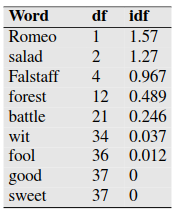

In [ ]:
display.Image("pic_tf-idf/0_BM0SUOJBB4niQs0f.png")

ตามรูป N = 37 ทำให้ good กับ sweet ที่มี df = 37 คือ idf ออกมาได้ 0 
ยิ่งค่า idf สูงๆแปลว่าคำๆนั้นสำคัญมาก 
                            สรุป 
               tf-idf สามารถคำนวณตรงๆ ได้เลยคือ 
                       w = tf * idf

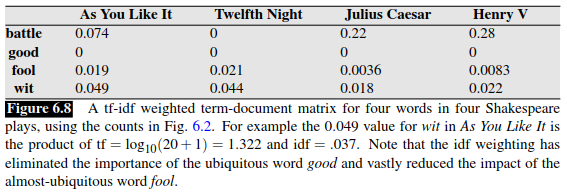

In [ ]:
display.Image("pic_tf-idf/0_xpFqparOAIPNTZw9.png")

เราจะใช้ tf-idf เป็นค่ามาตรฐาน (baseline) สำหรับพิจรณา weighting ของ cooccurrence matrix

#### Refer: https://medium.com/@sirasith.petch/word-embedding-tf-idf-%E0%B9%81%E0%B8%A5%E0%B8%B0-word2vec-%E0%B8%84%E0%B8%B7%E0%B8%AD%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3-%E0%B9%81%E0%B8%A5%E0%B9%89%E0%B8%A7%E0%B8%A1%E0%B8%B1%E0%B8%99%E0%B8%A1%E0%B8%B5%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%82%E0%B8%A2%E0%B8%8A%E0%B8%99%E0%B9%8C%E0%B8%A2%E0%B8%B1%E0%B8%87%E0%B9%84%E0%B8%87-9a6c593cf507

## Scikit-learn provides a module for calculating this, this is called TfidfVec- torizer. You can study how this function is used here

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer 

text_all = []
buff = 0 
directory = "review_polarity/txt_sentoken/neg/"
for filename in listdir(directory): 
    if not filename.endswith(".txt"):
        continue
    path = directory + "/" + filename
    file = open(path)
    text = file.read()
    file.close()
#     print(text)
    text_all.append(text)
    
directory = "review_polarity/txt_sentoken/pos/"
for filename in listdir(directory): 
    if not filename.endswith(".txt"):
        continue
    path = directory + "/" + filename
    file = open(path)
    text = file.read()
    file.close()
     #print(text)
    text_all.append(text)

In [22]:
# print(text_all)

In [23]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_all)

In [24]:
X.shape

(2000, 39659)

In [25]:
# Feature name 
# vectorizer.get_feature_names()

['00',
 '000',
 '0009f',
 '007',
 '00s',
 '03',
 '04',
 '05',
 '05425',
 '10',
 '100',
 '1000',
 '10000',
 '100m',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '10b',
 '10s',
 '10th',
 '11',
 '110',
 '111',
 '112',
 '113',
 '1138',
 '114',
 '115',
 '117',
 '118',
 '11th',
 '12',
 '121',
 '122',
 '123',
 '125',
 '126',
 '127',
 '1272',
 '128',
 '129',
 '1298',
 '12th',
 '13',
 '130',
 '1305',
 '131',
 '132',
 '133',
 '135',
 '137',
 '138',
 '139',
 '13th',
 '14',
 '140',
 '1400',
 '143',
 '144',
 '14th',
 '15',
 '150',
 '1500s',
 '150th',
 '151',
 '152',
 '1521',
 '153',
 '155',
 '1554',
 '157',
 '1583',
 '1590',
 '15th',
 '16',
 '160',
 '1600',
 '1600s',
 '161',
 '165',
 '167',
 '1692',
 '16mm',
 '16th',
 '16x9',
 '17',
 '170',
 '1700s',
 '1709',
 '172',
 '175',
 '1773',
 '1791',
 '1792',
 '1793',
 '1794',
 '1799',
 '17th',
 '18',
 '180',
 '1800',
 '1800s',
 '1812',
 '1830s',
 '1839',
 '1847',
 '1862',
 '1865',
 '1869',
 '1871',
 '1885',
 '1888',
 '189',
 '1

## 2.4 Classification

Use 4 different models to classify each movie into positive or negative category.

1. K-Nearestneighbormodel,using module `sklearn.neighbors.KNeighborsClassifier`
2. RandomForest, using module `sklearn.ensemble.RandomForestClassifier`
3. SVM, using module `sklearn.svm.SVC`
4. Neural network, using `sklearn.neural_network.MLPClassifier`

You may pick other models you would like to try. Just present results for at least 4 models.
Please provide your code for model fitting and cross validation. Calculate your classification accuracy, precision, and recall.

# ทำการแบ่งข้อมูลใหม่

In [56]:
Data_dir = "review_polarity/txt_sentoken/"

In [57]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_files

In [58]:
data = load_files(Data_dir , encoding = "utf-8" , decode_error="replace")

In [59]:
# data

In [60]:
# Calculate count of each category
labels , counts = np.unique(data.target , return_counts = True)

In [61]:
labels_str = np.array(data.target_names)[labels]
labels_str = dict(zip(labels_str , counts))

In [62]:
labels_str

{'neg': 1000, 'pos': 1000}

In [63]:
data.data[0]

"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma . \nyes , the film is t

In [64]:
data.target[0]

0

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer ,TfidfTransformer
vectorizer = TfidfVectorizer(stop_words="english"  , decode_error= "ignore").fit(data.data)
tf_idf = TfidfTransformer()
vector = tf_idf.fit_transform(vectorizer.fit_transform(data.data)) # x
print(vector.shape)

(2000, 39354)


In [66]:
# Data prepararion 
from sklearn.model_selection import train_test_split
X_train , x_test , y_train , y_test = train_test_split(vector , data.target , test_size = 0.2,random_state=42 )

In [67]:
X_train.shape

(1600, 39354)

In [68]:
y_train.shape

(1600,)

In [69]:
x_test.shape

(400, 39354)

# Build model 
1.K-Nearestneighbor

2.RandomForest

3.SVM

4.Neural network

Just present results for at least 4 models. Please provide your code for model fitting and cross validation.

Calculate your classification accuracy, precision, and recall.

# K-Nearestneighbor

In [41]:
from sklearn.model_selection import cross_val_predict , cross_val_score
from sklearn.metrics import  accuracy_score , precision_score , recall_score 
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)

neigh = KNeighborsClassifier(n_neighbors=5)
model = neigh.fit(X_train,y_train)

y_pred = model.predict(x_test)

# cross validation 
print(f"model (KNN) accuracy  : {accuracy_score(y_test,y_pred):.2f}")
print(f"model (KNN) precision : {precision_score(y_test, y_pred):.2f}")
print(f"model (KNN) recall    : {recall_score(y_test, y_pred):.2f}")

model (KNN) accuracy  : 0.66
model (KNN) precision : 0.67
model (KNN) recall    : 0.68


# RandomForest

In [42]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

clf = RandomForestClassifier(n_estimators=100, criterion="gini")
model = clf.fit(X_train ,y_train)

y_pred = model.predict(x_test)
print(f"model (RandomForest) accuracy  : {accuracy_score(y_test,y_pred):.2f}")
print(f"model (RandomForest) precision : {precision_score(y_test, y_pred):.2f}")
print(f"model (RandomForest) recall    : {recall_score(y_test, y_pred):.2f}")

model (RandomForest) accuracy  : 0.80
model (RandomForest) precision : 0.85
model (RandomForest) recall    : 0.76


# SVM

In [43]:
from sklearn.svm import SVC
np.random.seed(42)
svm = SVC(C=1 , kernel="sigmoid" , degree = 3)
model = svm.fit(X_train , y_train)
y_pred = model.predict(x_test)

print(f"model (SVM) accuracy  : {accuracy_score(y_test,y_pred):.2f}")
print(f"model (SVM) precision : {precision_score(y_test , y_pred):.2f}")
print(f"model (SVM) recall    : {recall_score(y_test, y_pred):.2f}")

model (SVM) accuracy  : 0.80
model (SVM) precision : 0.82
model (SVM) recall    : 0.79


# Neural network

In [ ]:
from sklearn.neural_network import MLPClassifier
np.random.seed(42)
Nn = MLPClassifier(hidden_layer_sizes=100 , activation='relu' 
                   ,alpha= 0.0001 , learning_rate='constant')
# y_pred_Nn = cross_val_predict(Nn , vector , y , cv = 5)
model = Nn.fit(X_train , y_train)
y_pred = model.predict(x_test)
print(f"model (Neural network) accuracy  : {accuracy_score(y_test,y_pred):.2f}")
print(f"model (Neural network) precision : {precision_score(y_test , y_pred):.2f}")
print(f"model (Neural network) recall    : {recall_score(y_test ,y_pred):.2f}")

model (Neural network) accuracy  : 0.81
model (Neural network) precision : 0.82
model (Neural network) recall    : 0.80


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
y = data.target
KNN = KNeighborsClassifier(n_neighbors=5)
RFC = RandomForestClassifier(n_estimators=100, criterion="gini")
SVM = SVC(C=1 , kernel="sigmoid" , degree = 3)
MLP = MLPClassifier(hidden_layer_sizes=100 , activation='relu' 
                   ,alpha= 0.0001 , learning_rate='constant')
names_model = ["KNeighbors" , "RandomForest" , "SCV" , "Neural Network"]
list_model = [KNN,
              RFC,
              SVM,
              MLP]
for i , model in enumerate(list_model):
    y_pred = cross_val_predict(model , vector , y , cv =5)
    print(f"Name model : {names_model[i]}")
    print("Classification report")
    print(classification_report (y , y_pred , target_names = ['Neg' , 'Pos']))

Name model : KNeighbors
Classification report
              precision    recall  f1-score   support

         Neg       0.66      0.60      0.63      1000
         Pos       0.64      0.69      0.67      1000

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.65      0.65      0.65      2000

Name model : RandomForest
Classification report
              precision    recall  f1-score   support

         Neg       0.76      0.84      0.80      1000
         Pos       0.82      0.74      0.78      1000

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000

Name model : SCV
Classification report
              precision    recall  f1-score   support

         Neg       0.81      0.80      0.81      1000
         Pos       0.80      0.81      0.81      1000

    accuracy                           0.81      

## 2.5 Model Tuning

Can you try to beat the simple model you created above? Here are some things you may try:

* When creating TfidfVectorizer object, you may tweak sublinear_tf parameter which use the tf with logarithmic scale instead of the usual tf.
* You may also exclude words that are too frequent or too rare, by adjusting max_df and min_df.
* Adjusting parameters available in the model, like neural network structure or number of trees in the forest.

Design at least 3 experiments using these techniques. Show your experimental results.


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer ,TfidfTransformer

vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words="english" ,max_df = 1 , min_df = 1).fit(data.data)
tf_idf = TfidfTransformer()
vector = tf_idf.fit_transform(vectorizer.fit_transform(data.data)) # x
print(vector.shape)

(2000, 15570)


In [71]:
X_var, x_buff , y_var , y_buff = train_test_split(x_test , y_test , test_size = 0.3 )

Text(0, 0.5, 'loss')

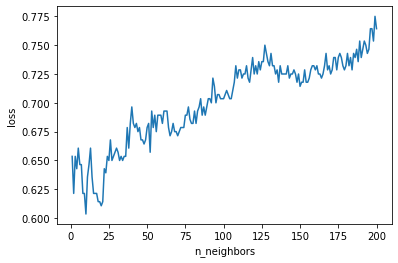

In [72]:
# Tune KNN 
log_data = {'n_neighbors' : [],
            'loss' : []}
for i in range (1,201):
    KNN = KNeighborsClassifier(n_neighbors=i)
    model = KNN.fit(X_train , y_train)
    y_pred = model.predict(X_var)
    accu = accuracy_score(y_var , y_pred)
    log_data['n_neighbors'].append(i)
    log_data['loss'].append(accu)
plt.plot(log_data['n_neighbors'] ,log_data['loss'])
plt.xlabel('n_neighbors')
plt.ylabel('loss')

In [76]:
from sklearn.metrics import confusion_matrix,classification_report
N = KNeighborsClassifier(n_neighbors= 130)
model = KNN.fit(X_train , y_train)
y_pred = model.predict(x_test)
print(f"Confusion matrix : \
       \n {confusion_matrix(y_test , y_pred)}")
print(f"Classification Report : \
       \n {classification_report (y_test , y_pred , target_names = ['Neg' , 'Pos']) }")

Confusion matrix :        
 [[153  37]
 [ 54 156]]
Classification Report :        
               precision    recall  f1-score   support

         Neg       0.74      0.81      0.77       190
         Pos       0.81      0.74      0.77       210

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.78      0.77      0.77       400



Text(0, 0.5, 'loss')

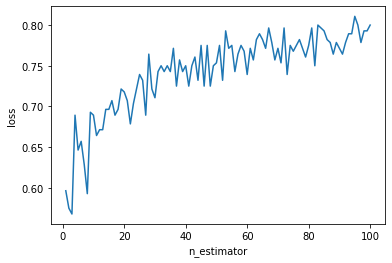

In [51]:
# Tune Random Forest 
log_data = {'n_estimator' : [],
            'loss' : []}

for i in range(1,101):
    model = RandomForestClassifier(n_estimators=i).fit(X_train , y_train)
    y_pred = model.predict(X_var)
    accu = accuracy_score(y_var , y_pred)
    log_data['n_estimator'].append(i)
    log_data['loss'].append(accu)
plt.plot(log_data['n_estimator'] ,log_data['loss'])
plt.xlabel('n_estimator')
plt.ylabel('loss')

In [52]:
RFC = RandomForestClassifier(n_estimators=83, criterion="gini")
model = RFC.fit(X_train , y_train)
y_pred = model.predict(x_test)
print(f"Confusion matrix : \
      \n{confusion_matrix(y_test , y_pred)}")
print(f"Classification Report : \
      \n{classification_report (y_test , y_pred , target_names = ['Neg' , 'Pos']) }")

Confusion matrix :       
[[154  36]
 [ 57 153]]
Classification Report :       
              precision    recall  f1-score   support

         Neg       0.73      0.81      0.77       190
         Pos       0.81      0.73      0.77       210

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
Nn_tuning = MLPClassifier(max_iter=1000 , early_stopping=True , n_iter_no_change=20 )
hidden_layer_sizes = [(70,55,70),(100)]
activation = ["identity" , "logistic" , "tanh" ,"relu"]
solver = ["lbfgs" , "sgd" ,"adam"]
alpha = [0.001 , 0.005 ]
learning_rate = ['constant' , 'invscaling' ,'adaptive']

param_grid = dict(hidden_layer_sizes= hidden_layer_sizes , activation=activation,
                  solver=solver , alpha=alpha , learning_rate = learning_rate)
grid = GridSearchCV(Nn_tuning , param_grid ,n_jobs= -1 , cv=10 )
print(param_grid)
grid.fit(X_train , y_train)

{'hidden_layer_sizes': [(70, 55, 70), 100], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.001, 0.005], 'learning_rate': ['constant', 'invscaling', 'adaptive']}


GridSearchCV(cv=10,
             estimator=MLPClassifier(early_stopping=True, max_iter=1000,
                                     n_iter_no_change=20),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.001, 0.005],
                         'hidden_layer_sizes': [(70, 55, 70), 100],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [ ]:
print(f"Good parameters : {grid.best_params_}")

Good parameters : {'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (70, 55, 70), 'learning_rate': 'invscaling', 'solver': 'adam'}


# 3 Text Clustering
We have heard about Google News clustering. In this exercise, we are going to implement it with Python.

## 3.1 Data Preprocessing
Let’s switch up and use another dataset called 20newsgroup data, which is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. The data is collected from a university’s mailing list, where students exchange opinions in everything from motorcycles to middle east politics.

1. Import data using sklearn.datasets.fetch_20newsgroups 
2. Transform data to vector with TfidfVectorizer

In [93]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')

In [94]:
data = newsgroups_train.data

In [95]:
labels = newsgroups_train.target

In [78]:
labels

array([7, 4, 4, ..., 3, 1, 8])

In [79]:
import numpy as np
true_k = np.unique(labels).shape[0]
true_k

20

In [80]:
newsgroups_train.filenames.shape , newsgroups_train.target.shape

((11314,), (11314,))

In [81]:
from pprint import pprint
pprint(list(newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
categories = list(newsgroups_train.target_names)
newsgroups_train = fetch_20newsgroups(subset='train' , categories=categories)

vectorizer = TfidfVectorizer( stop_words='english' , analyzer = 'word')
X = vectorizer.fit_transform(newsgroups_train.data)

In [83]:
idf = vectorizer.idf_
print(dict(zip(vectorizer.get_feature_names(),idf)))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [84]:
X.shape

(11314, 129796)

## 3.2 Clustering
We are going to use the simplest clustering model, k-means clustering, to do this task. Our hope is that this simple algorithm will result in meaningful news categories, without using labels.

1. Fit K-Means clustering model to the text vector. What is the value of K you should pick? Why?
2. Use Silhouette score to evaluate your clusters. Try to evaluate the model for different values of k to see which k fits best for the dataset.

In [85]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np 
np.random.seed(42)
score = []
# ค่า k จริงๆ ที่เราจะใช้เราจะต้องดูตามความเหมาะสม เดี๋ยวจะวน loop เพื่อหาค่า k ที่ดีที่สุด เราจะดูจากค่า Shilshouette_score
for i in range(2 , 21, 1):
    Km = KMeans(n_clusters=i )
    %time Km.fit(X)
    silhouette_avg = metrics.silhouette_score(X ,Km.labels_)
    score.append(silhouette_avg)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)
    
# print(f"V-measure  : {metrics.v_measure_score(labels , Km.labels_):.2f} ")
# print(f"Silhouette : {metrics.silhouette_score(X ,Km.labels_ , sample_size=1000):.4f}")


CPU times: user 38.5 s, sys: 459 ms, total: 39 s
Wall time: 5.77 s
For n_clusters = 2 The average silhouette_score is : 0.0016376013719498323
CPU times: user 39.7 s, sys: 357 ms, total: 40.1 s
Wall time: 5.94 s
For n_clusters = 3 The average silhouette_score is : 0.0019373149769593059
CPU times: user 1min 3s, sys: 618 ms, total: 1min 4s
Wall time: 9.33 s
For n_clusters = 4 The average silhouette_score is : 0.0022808548130325364
CPU times: user 1min 24s, sys: 705 ms, total: 1min 24s
Wall time: 12.5 s
For n_clusters = 5 The average silhouette_score is : 0.0022802429886691973
CPU times: user 1min 38s, sys: 1.03 s, total: 1min 39s
Wall time: 15.1 s
For n_clusters = 6 The average silhouette_score is : 0.002819323912919021
CPU times: user 1min 39s, sys: 1.08 s, total: 1min 40s
Wall time: 15.5 s
For n_clusters = 7 The average silhouette_score is : 0.0031190152118323895
CPU times: user 1min 59s, sys: 1.23 s, total: 2min 1s
Wall time: 18.7 s
For n_clusters = 8 The average silhouette_score is : 

In [86]:
k = score.index(max(score)) +2 
k

20

# 3.3 Topic Terms
We want to explore each cluster to understand what news articles are in the cluster, what terms are associated with the cluster. This will require a bit of hacking.
1. Use TfidfVectorizer.get feature names to extract words associated with each dimension of the text vector.
2. Extract cluster’s centroids using kmeans.cluster centers .
3. For each centroid, print the top 15 words that have the highest frequency.

In [87]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '00000000',
 '0000000004',
 '0000000005',
 '00000000b',
 '00000001',
 '00000001b',
 '0000000667',
 '00000010',
 '00000010b',
 '00000011',
 '00000011b',
 '0000001200',
 '00000074',
 '00000093',
 '000000e5',
 '00000100',
 '00000100b',
 '00000101',
 '00000101b',
 '00000110',
 '00000110b',
 '00000111',
 '00000111b',
 '00000315',
 '000005102000',
 '00000510200001',
 '000007',
 '00000ee5',
 '00001000',
 '00001000b',
 '00001001',
 '00001001b',
 '00001010',
 '00001010b',
 '00001011',
 '00001011b',
 '000010af',
 '00001100',
 '00001100b',
 '00001101',
 '00001101b',
 '00001110',
 '00001110b',
 '00001111',
 '00001111b',
 '000021',
 '000042',
 '000062david42',
 '000094',
 '0000vec',
 '0001',
 '00010000',
 '00010000b',
 '00010001',
 '00010001b',
 '00010010',
 '00010010b',
 '00010011',
 '00010011b',
 '000100255pixel',
 '00010100',
 '00010100b',
 '00010101',
 '00010101b',
 '00010110',
 '00010110b',
 '00010111',
 '00010111b',
 '00011000',
 '00011000b',
 '00

In [88]:
centroids = Km.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names() 

for i in range(k):
    print(f"Cluster : {i}")
    for j in centroids[i,:15]:
        print(f'{terms[j]}')
    print("\n")

Cluster : 0
keith
caltech
livesey
morality
sgi
objective
solntze
wpd
jon
schneider
cco
allan
moral
edu
atheists


Cluster : 1
car
com
cars
edu
___
radar
engine
writes
just
article
dealer
good
like
don
ca


Cluster : 2
com
gun
people
edu
don
government
guns
think
writes
msg
article
just
like
fbi
stratus


Cluster : 3
columbia
gld
cunixb
cc
dare
gary
edu
keenan
cunixa
insurance
pgf5
garfiel
domi
cunixc
freeman


Cluster : 4
virginia
cramer
optilink
clayton
kaldis
edu
gay
men
homosexual
clas
rutgers
sexual
com
gsh7w
university


Cluster : 5
key
clipper
encryption
chip
escrow
keys
government
com
crypto
algorithm
intercon
secure
nsa
des
amanda


Cluster : 6
mouse
driver
windows
port
edu
com1
cursor
com3
adb
com
irq
diamond
serial
nlm
sys


Cluster : 7
team
game
edu
ca
hockey
players
games
year
play
season
baseball
nhl
win
league
teams


Cluster : 8
window
motif
widget
application
server
mit
manager
xterm
com
dresden
tu
uk
problem
windows
edu


Cluster : 9
edu
com
subject
lines
organization


In [96]:
test_data = vectorizer.transform([data[400]])
Km = KMeans(n_clusters=20)
model = Km.fit(X)
clu = model.predict(test_data)[0]
clu

7

In [97]:
data[400]

"From: hooper@ccs.QueensU.CA (Andy Hooper)\nSubject: Re: text of White House announcement and Q&As on clipper chip encryption\nOrganization: Queen's University, Kingston\nDistribution: na\nLines: 3\n\nIsn't Clipper a trademark of Fairchild Semiconductor?\n\nAndy Hooper\n"